In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

X.shape: (26, 2)


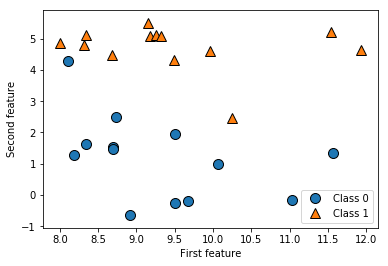

In [3]:
# forgeデータセット(2features * 26)
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

X.shape: (40, 1)


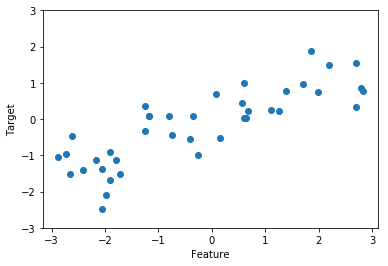

In [4]:
# waveデータセット(1feature * 40)
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
print("X.shape: {}".format(X.shape))

In [5]:
# cancerデータセット(30 features * 569)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))


cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# bostonデータセット(13featuresをfeature engineeringして 104features * 506)
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape: (506, 13)
X.shape: (506, 104)


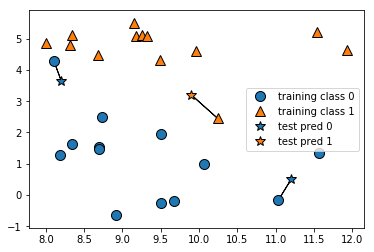

In [7]:
# k最近傍法による分類(k=1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

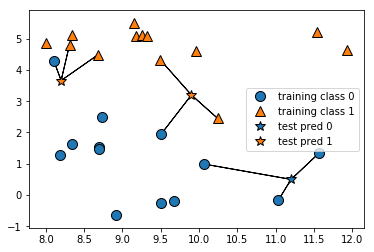

In [8]:
# k最近傍法による分類(k=3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

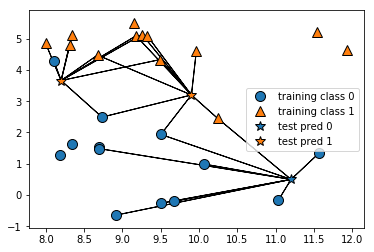

In [9]:
# k最近傍法による分類(k=9)
mglearn.plots.plot_knn_classification(n_neighbors=9)

In [10]:
# forgeのデータセットとテストセットから分類機を作成

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from  sklearn.neighbors  import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


clf.fit(X_train,  y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


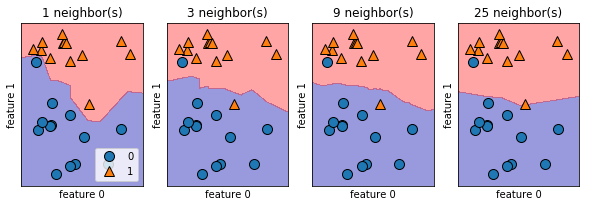

In [11]:
# KNeighborsClassifierの解析
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

# 決定境界の描画
for n_neighbors, ax in zip([1, 3, 9,25 ], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=4)

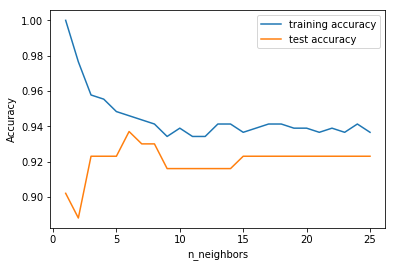

In [12]:
# 最近傍点に対する訓練精度とテスト精度
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 25
neighbors_settings = range(1, 26)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

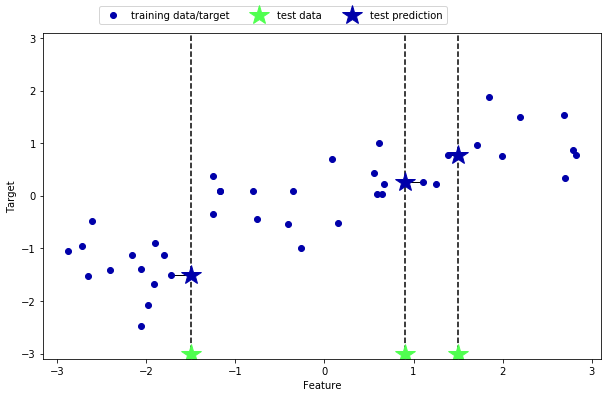

In [13]:
# waveデータを用いたk近傍回帰(k=1)
mglearn.plots.plot_knn_regression(n_neighbors=1)

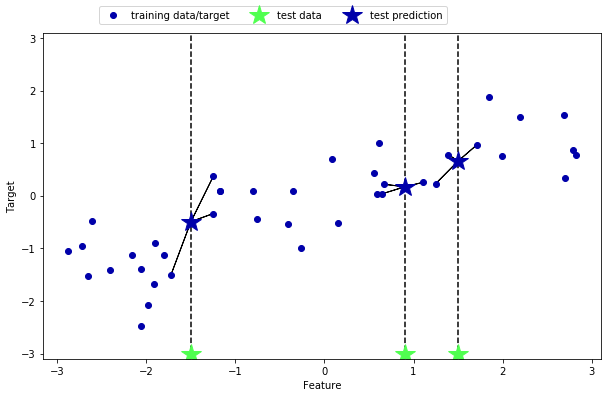

In [14]:
# k近傍回帰(k=3)
mglearn.plots.plot_knn_regression(n_neighbors=3)

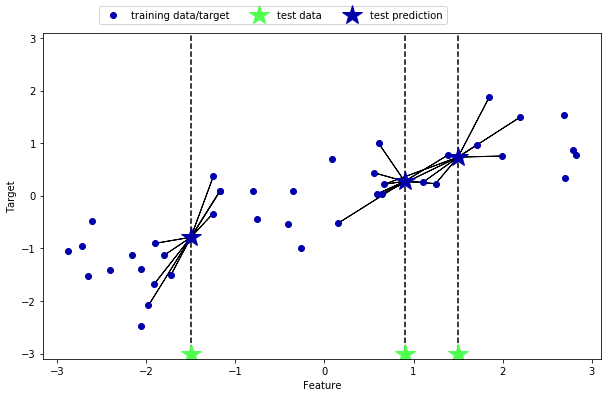

In [15]:
# k近傍回帰(k=9)
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [16]:
# k=3のKNeighborRegressorから決定係数R^2を求める
# 決定係数は0-1の範囲を取り、1に近いほど良いモデル
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)


print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


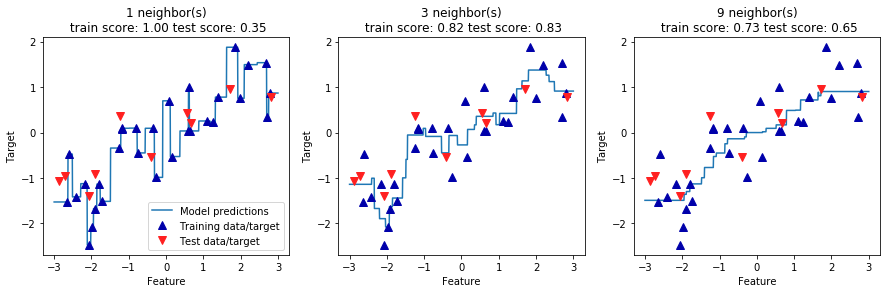

In [17]:
# KNeighborRegressorの解析
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

# k=1だと予測は不安定であり、kを増やしていくと予測はスムーズになるが訓練データに対する適合度が下がる

In [26]:
# 線形モデル

# 最小二乗法
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train
                           )
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score(wave): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score(wave): {:.2f}".format(lr.score(X_test, y_test)))

# 高次なデータセットを利用
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score(boston): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score(boston): {:.2f}".format(lr.score(X_test, y_test)))

# 訓練セットとデータセットで性能が大きく異なるのはoverfittingが起きているため

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score(wave): 0.67
Test set score(wave): 0.66
Training set score(boston): 0.95
Test set score(boston): 0.61


In [23]:
# リッジ回帰
# 最小二乗法に正規化項(L2ノルム)を桑会える
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test))) 

# Training set scoreはLinearRegressionよりも低く、Test set scoreに対するスコアは高い
# LinearRegressionモデルよりもRidgeモデルのほうが汎化性能が高い

Training set score: 0.67
Test set score: 0.66


Training set score(alpha=0.1): 0.93
Test set score(alpha=0.1): 0.77
Training set score(alpha=1): 0.89
Test set score(alpha=1): 0.75
Training set score(alpha=10): 0.79
Test set score(alpha=10): 0.64


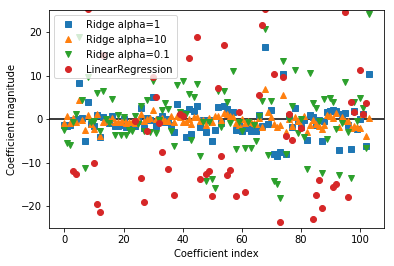

In [36]:
# alphaパラメータのチューニング
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score(alpha=0.1): {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score(alpha=0.1): {:.2f}".format(ridge01.score(X_test, y_test)))

ridge = Ridge().fit(X_train, y_train)
print("Training set score(alpha=1): {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score(alpha=1): {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score(alpha=10): {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score(alpha=10): {:.2f}".format(ridge10.score(X_test, y_test)))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

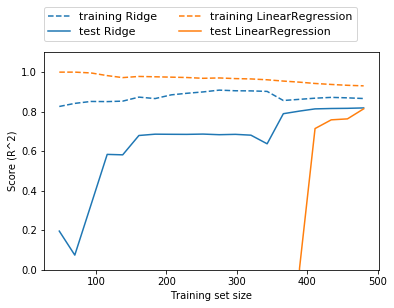

In [37]:
# bostonデータセットに対するリッジ回帰と線形回帰の学習曲線
mglearn.plots.plot_ridge_n_samples()

# データが少ない場合にリッジ回帰のテストスコアが高い
# 十分なデータある場合は正規化はあまり重要ではなくなる

Training set score: 0.29
Test set score: 0.21
Number of features used: 4
Training set score(alpha=0.01): 0.90
Test set score(alpha=0.01): 0.77
Number of features used(alpha=0.01): 33
Training set score(alpha=0.0001): 0.95
Test set score(alpha=0.0001): 0.64
Number of features used(alpha=0.0001): 94


Text(0,0.5,'Coefficient magnitude')

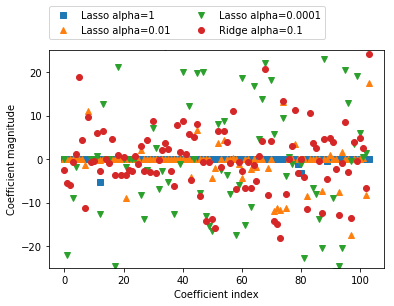

In [43]:
# ラッソ回帰
# L1正規化によって係数が0になる
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score(alpha=0.01): {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score(alpha=0.01): {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used(alpha=0.01): {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score(alpha=0.0001): {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score(alpha=0.0001): {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used(alpha=0.0001): {}".format(np.sum(lasso00001.coef_ != 0)))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# alphaを小さくしすぎると、リッジと同様に正規化の効果が薄れてoverfittingになる
# まずはリッジ回帰を試す。特徴量がたくさんあってそのうち重要なものが僅かであれば、ラッソが良い
# scikit-learnにはLassoとRidgeを組み合わせたElasticNetがある。良い結果をもたらすがL1正規化パラメータとL2正規化パラメータのチューニングが必要

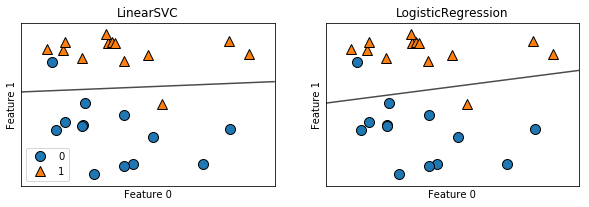

In [44]:
# 線形モデルのクラス分類
# 一般的な線形クラス分類アルゴリズムは「ロジスティック回帰」と「線形サポートベクタマシーン」
# ロジスティック回帰は回帰アルゴリズムではなくクラス分類アルゴリズム

# LogisticRegressionとLinearSVCをforgeデータセットに適用して、決定境界を可視化
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

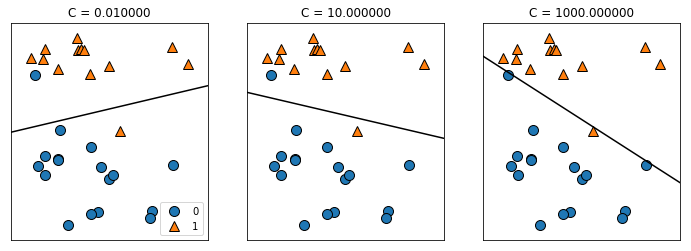

In [47]:
# 正規化の強度を決定するトレードオフパラメータCを変化させたときの決定境界
mglearn.plots.plot_linear_svc_regularization()

# C=100はoverfittingになっている

Training set score(C=0.01): 0.934
Test set score(C=0.01): 0.930
Training set score(C=1): 0.955
Test set score(C=1): 0.958
Training set score(C=100): 0.972
Test set score(C=100): 0.965


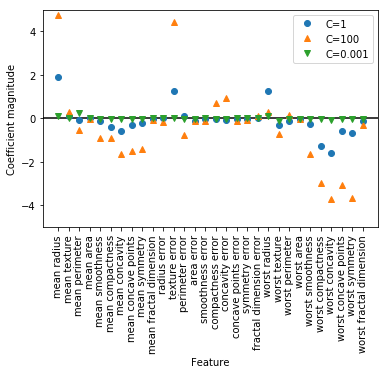

In [53]:
#  cancerデータセットを用いてCを変化させたときのロジスティック回帰のスコア
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score(C=0.01): {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score(C=0.01): {:.3f}".format(logreg001.score(X_test, y_test)))

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score(C=1): {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score(C=1): {:.3f}".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score(C=100): {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score(C=100): {:.3f}".format(logreg100.score(X_test, y_test)))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# C=100の複雑なモデルのほうが性能が高い

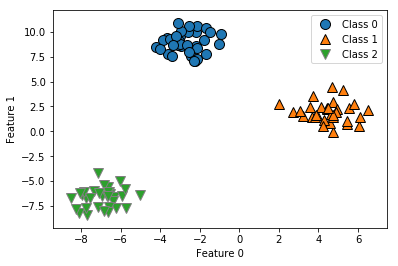

In [56]:
# 多クラス分類。一対その他でそれぞれ分類
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


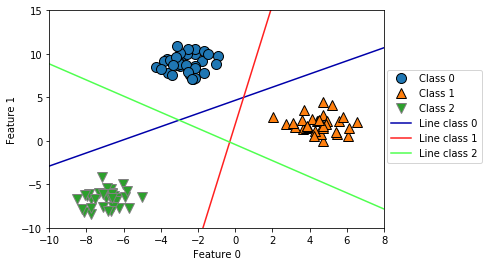

In [59]:
# 多クラス分類の学習と可視化
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

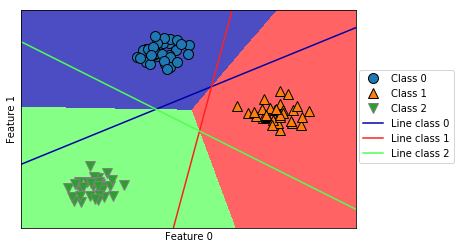

In [60]:
＃ 中央の三角形の部分の境界はどうするか
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")